### NoteBook Outline
    .1 Data Set Exploration 
    .2 Data Cleaning && Mini visualization
    .3 Applying Content Based Filter (Title of The book and descryptino)
    

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics.pairwise import linear_kernel as kern 
from sklearn.feature_extraction.text import TfidfVectorizer as tfidfv
import matplotlib.pyplot as plt
import zipfile


In [2]:
with zipfile.ZipFile("books.zip", 'r') as z:
    with z.open("data.csv") as f:
        df = pd.read_csv(f)

df.sample(25)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
2411,9780393322965,0393322963,The Bush Dyslexicon,Observations on a National Disorder,Mark Crispin Miller,Biography & Autobiography,http://books.google.com/books/content?id=yU42i...,"""A particularly astute analysis of the televis...",2002.0,3.56,370.0,208.0
2500,9780395647417,039564741X,The Lord of the Rings,NaN,J. R. R. Tolkien;Alan Lee,Fiction,NaN,The three books that make up The Lord of the R...,1992.0,NaN,NaN,NaN
580,9780099449867,0099449862,Elephant,And Other Stories,Raymond Carver,"Short stories, American",http://books.google.com/books/content?id=c0EEf...,These seven stories were the last that Carver ...,2003.0,4.11,124.0,1063.0
3838,9780671040840,0671040847,The Living Blood,NaN,Tananarive Due,Fiction,http://books.google.com/books/content?id=JGMqS...,Struggling to rebuild her life after the disap...,2002.0,4.33,515.0,1777.0
6753,9781932416640,1932416641,What is the what,The Autobiography of Valentino Achak Deng : a ...,Dave Eggers,Fiction,http://books.google.com/books/content?id=Ps8LA...,A biographical novel traces the story of Valen...,2006.0,4.16,475.0,64088.0
2520,9780399153891,0399153896,John's Story,The Last Eyewitness,Tim F. LaHaye,Bible,http://books.google.com/books/content?id=LbzSw...,"At ninety years old, John is the last of the o...",2006.0,3.93,310.0,1108.0
5074,9780806509020,0806509023,Existentialism and Human Emotions,NaN,Jean-Paul Sartre,Philosophy,http://books.google.com/books/content?id=qrYbI...,NaN,1985.0,3.84,96.0,4090.0
5695,9781400032808,1400032806,Under the Banner of Heaven,A Story of Violent Faith,Jon Krakauer,History,http://books.google.com/books/content?id=kw2e7...,Traces the events that surrounded the 1984 mur...,2004.0,3.99,399.0,7271.0
6008,9781557280244,155728024X,The Apple that Astonished Paris,Poems,Billy Collins,American poetry,http://books.google.com/books/content?id=6mwhk...,Billy Collins strikes at the deepest concerns ...,1988.0,4.20,61.0,530.0
1572,9780312861438,0312861435,The Memory of Whiteness,A Scientific Romance,Kim Stanley Robinson,Fiction,http://books.google.com/books/content?id=NZak7...,"In the year 3229 AD, when the best and sometim...",1996.0,3.56,352.0,431.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [4]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [5]:
df.drop_duplicates(inplace=True)
df.fillna(" ",inplace=True)
print("our duplicate number is ",df.duplicated().sum())
print("our na value in each column:\n",df.isna().sum())

our duplicate number is  0
our na value in each column:
 isbn13            0
isbn10            0
title             0
subtitle          0
authors           0
categories        0
thumbnail         0
description       0
published_year    0
average_rating    0
num_pages         0
ratings_count     0
dtype: int64


C:\Users\Loay\AppData\Local\Temp\ipykernel_15804\1207134159.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(" ",inplace=True)


In [6]:
df.sample(25)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
6173,9781573229623,1573229628,Prozac Nation,Young and Depressed in America,Elizabeth Wurtzel,Biography & Autobiography,http://books.google.com/books/content?id=441Xv...,"A memoir of sex, drugs, and depression indicts...",2002.0,3.59,384.0,875.0
1838,9780345439109,0345439104,Drowning Ruth,,Christina Schwarz,Fiction,http://books.google.com/books/content?id=Thtnw...,An Oprah Book Club selection and bestseller in...,2001.0,3.74,368.0,72319.0
1913,9780345481337,034548133X,A Dangerous Man,,Charlie Huston,Fiction,http://books.google.com/books/content?id=e_VvD...,Reluctant hitman Henry Thompson returns to New...,2006.0,4.07,286.0,2681.0
2451,9780393977615,0393977617,Death and the King's Horseman,"Authoritative Text : Backgrounds and Contexts,...",Wole Soyinka;Simon Gikandi,Drama,http://books.google.com/books/content?id=Q2loQ...,This Norton Critical Edition of Death and the ...,2003.0,3.76,254.0,249.0
2611,9780425198322,0425198324,Death's Acre,Inside the Legendary Forensic Lab-The Body Far...,Bill Bass;William M. Bass;Jon Jefferson,True Crime,http://books.google.com/books/content?id=MTLS-...,A leading forensic anthropologist traces his s...,2004.0,4.18,320.0,8118.0
2864,9780446518628,044651862X,The Celestine Prophecy,An Adventure,James Redfield,Fiction,http://books.google.com/books/content?id=UXolx...,You have never read a book like this before --...,1994.0,3.63,247.0,1280.0
3672,9780590440615,0590440616,Werewolves Don't Go to Summer Camp,,Debbie Dadey;Marcia Thornton Jones,Juvenile Fiction,http://books.google.com/books/content?id=amxxn...,The Bailey Elementary School third graders are...,1991.0,3.83,96.0,2119.0
5706,9781400033836,1400033837,A Thousand Acres,A Novel,Jane Smiley,Fiction,http://books.google.com/books/content?id=Y5YMz...,"On a prosperous Iowa farm in the 1970s, wealth...",2003.0,3.8,371.0,51670.0
6330,9781590171240,1590171241,An Episode of Sparrows,A Novel,Rumer Godden,Juvenile Fiction,http://books.google.com/books/content?id=wLgdp...,"In post-World War II London, two street-tough ...",2004.0,4.2,247.0,851.0
2136,9780375753107,0375753109,Sodom and Gomorrah,,Marcel Proust,Fiction,http://books.google.com/books/content?id=4lmMx...,A revised translation of the final volume in P...,1992.0,4.36,784.0,354.0


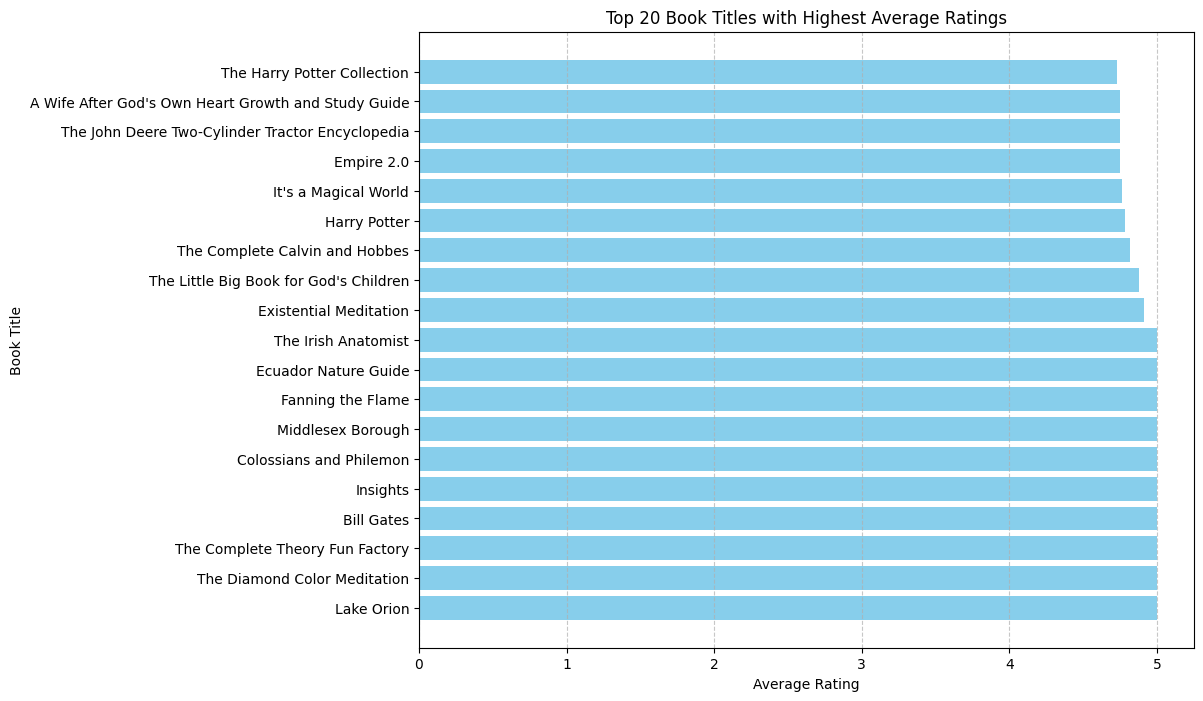

In [7]:

df_plt = df[['title', 'average_rating']].copy()
df_plt['average_rating'] = pd.to_numeric(df_plt['average_rating'], errors='coerce')

df_sorted = df_plt.sort_values(by='average_rating', ascending=False)

# Filter to get top N books
N = 20
df_top_n = df_sorted.head(N)  # Use head() to get top N rows with highest ratings

# Create the horizontal bar chart for top N books
plt.figure(figsize=(10, 8))
plt.barh(df_top_n['title'], df_top_n['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.title(f'Top {N} Book Titles with Highest Average Ratings')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [8]:
filter =tfidfv(stop_words="english")
filtered = filter.fit_transform(df['description'])


In [9]:
print(filtered)

  (0, 1270)	0.07435500509377538
  (0, 7148)	0.09866370229295587
  (0, 24304)	0.04982018842104199
  (0, 26134)	0.06266297958840415
  (0, 20089)	0.06151221392641322
  (0, 20469)	0.09212178684876712
  (0, 25262)	0.07634112692365638
  (0, 10286)	0.08321236026608507
  (0, 3609)	0.08582091112559372
  (0, 23495)	0.08321236026608507
  (0, 26723)	0.05270061228530821
  (0, 12621)	0.05511030030286663
  (0, 19041)	0.06252937799365406
  (0, 29959)	0.03368176806728684
  (0, 29989)	0.07591598871598011
  (0, 717)	0.08174920158545738
  (0, 4766)	0.0767823118219785
  (0, 25250)	0.07821553447523535
  (0, 7694)	0.06937407327179136
  (0, 25049)	0.09866370229295587
  (0, 27948)	0.058615006122006215
  (0, 13303)	0.07510946119969157
  (0, 2941)	0.06200973634244835
  (0, 10560)	0.04964239012979085
  (0, 29165)	0.068679412755585
  :	:
  (6808, 19314)	0.044731869378640175
  (6808, 28446)	0.06684269851648515
  (6808, 4114)	0.07240680002748569
  (6808, 26095)	0.12056814592894458
  (6808, 4808)	0.1314010588463282
 

In [10]:
similar = kern(filtered,filtered)

In [11]:
books = pd.Series(df['isbn13'].index , index = df['title'])
books

title
Gilead                          0
Spider's Web                    1
The One Tree                    2
Rage of angels                  3
The Four Loves                  4
                             ... 
I Am that                    6805
Secrets Of The Heart         6806
Fahrenheit 451               6807
The Berlin Phenomenology     6808
'I'm Telling You Stories'    6809
Length: 6810, dtype: int64

In [12]:
def recommend(book_name,top=11,similar=similar):
    scores = enumerate(similar[books[book_name]])
    scores =sorted(scores,key=lambda x:x[1],reverse=True)
    index = []
    for i in scores:
        index.append(books[i[0]])
    print(books[index][1:top])
recommend("I Am that")

title
The Man Who Sold The Moon             3857
The Sun in the Morning                1453
Art of Being                          5321
Existentialists and Mystics            724
Kaddish and Other Poems: 1958-1960    5454
Acts of Faith                         2118
Zen Buddhism & Psychoanalysis         1374
The Trojan Women and Hippolytus       3197
An Invisible Sign of My Own           2316
The Passion of Jesus Christ           6239
dtype: int64


C:\Users\Loay\AppData\Local\Temp\ipykernel_15804\1385240238.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  index.append(books[i[0]])
C:\Users\Loay\AppData\Local\Temp\ipykernel_15804\1385240238.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(books[index][1:top])
